In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gmaps
from citipy import citipy
from datetime import datetime
from scipy.stats import linregress

# Import the requests library
import requests

# Import the API key
from config import weather_api_key
from config import g_key

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1




Beginning Data Retrieval     
-----------------------------


In [4]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each of the latitude and longitude combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

626

In [5]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=12541dcd367261fc7c2e2e12a500423a


In [6]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather["sys"]["country"]
        # Conver the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information itno city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat, 
                         "Lng": city_lng, 
                         "Max Temp": city_max_temp, 
                         "Humidity": city_humidity, 
                         "Cloudiness": city_clouds, 
                         "Wind Speed": city_wind, 
                         "Country": city_country, 
                         "Date": city_date})

# If an error is experienced, skip the city
    except: 
        print("City not found. Skipping...")
        pass
    
# Indidcate that Data Loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

Processing Record 1 of Set 1 | muttupet
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | baghdad
Processing Record 5 of Set 1 | kremenki
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | maneadero
City not found. Skipping...
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | yerbogachen
Processing Record 12 of Set 1 | asau
City not found. Skipping...
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | abu zabad
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | vanimo
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | sa

Processing Record 37 of Set 4 | mayya
Processing Record 38 of Set 4 | kaitangata
Processing Record 39 of Set 4 | armacao dos buzios
City not found. Skipping...
Processing Record 40 of Set 4 | sohag
Processing Record 41 of Set 4 | ijaki
City not found. Skipping...
Processing Record 42 of Set 4 | tessalit
Processing Record 43 of Set 4 | griffith
Processing Record 44 of Set 4 | hithadhoo
Processing Record 45 of Set 4 | keita
Processing Record 46 of Set 4 | shawnee
Processing Record 47 of Set 4 | lavrentiya
Processing Record 48 of Set 4 | kodiak
Processing Record 49 of Set 4 | san patricio
Processing Record 50 of Set 4 | kokopo
Processing Record 1 of Set 5 | formoso do araguaia
City not found. Skipping...
Processing Record 2 of Set 5 | iqaluit
Processing Record 3 of Set 5 | sioux lookout
Processing Record 4 of Set 5 | mantenopolis
Processing Record 5 of Set 5 | camana
City not found. Skipping...
Processing Record 6 of Set 5 | maniitsoq
Processing Record 7 of Set 5 | soyo
Processing Record 

Processing Record 26 of Set 8 | jurm
Processing Record 27 of Set 8 | monterey
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | oshnaviyeh
Processing Record 30 of Set 8 | zruc nad sazavou
Processing Record 31 of Set 8 | moindou
Processing Record 32 of Set 8 | sacama
Processing Record 33 of Set 8 | isangel
Processing Record 34 of Set 8 | saint-joseph
Processing Record 35 of Set 8 | marystown
Processing Record 36 of Set 8 | katsuura
Processing Record 37 of Set 8 | dolinsk
Processing Record 38 of Set 8 | lagoa formosa
Processing Record 39 of Set 8 | nouadhibou
Processing Record 40 of Set 8 | shingu
Processing Record 41 of Set 8 | kununurra
Processing Record 42 of Set 8 | tuatapere
Processing Record 43 of Set 8 | podyuga
Processing Record 44 of Set 8 | jiuquan
Processing Record 45 of Set 8 | nizhniy kuranakh
Processing Record 46 of Set 8 | cabedelo
Processing Record 47 of Set 8 | adelaide
Processing Record 48 of Set 8 | vardo
Processing Record 49 of Set 8 | san f

Processing Record 12 of Set 12 | midrand
Processing Record 13 of Set 12 | varlamovo
Processing Record 14 of Set 12 | pangkalanbuun
Processing Record 15 of Set 12 | zaraza
Processing Record 16 of Set 12 | hualmay
Processing Record 17 of Set 12 | severomuysk
Processing Record 18 of Set 12 | garachine
Processing Record 19 of Set 12 | nicoya
Processing Record 20 of Set 12 | bilibino
Processing Record 21 of Set 12 | palmer
Processing Record 22 of Set 12 | gwadar
Processing Record 23 of Set 12 | carbonia
Processing Record 24 of Set 12 | kudahuvadhoo
Processing Record 25 of Set 12 | havoysund
Processing Record 26 of Set 12 | limbang
Processing Record 27 of Set 12 | muzhi
Processing Record 28 of Set 12 | sao joao da barra
Processing Record 29 of Set 12 | shirokiy
Processing Record 30 of Set 12 | acapulco
Processing Record 31 of Set 12 | nampula
Processing Record 32 of Set 12 | paramirim
Processing Record 33 of Set 12 | adre
Processing Record 34 of Set 12 | taldan
Processing Record 35 of Set 12

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Muttupet,10.40,79.48,83.82,71,6,4.36,IN,2019-11-08 04:22:18
1,Mataura,-46.19,168.86,68.45,39,37,11.21,NZ,2019-11-08 04:22:18
2,Torbay,47.66,-52.73,37.40,69,75,13.87,CA,2019-11-08 04:22:18
3,Baghdad,33.30,44.38,55.40,50,0,4.70,IQ,2019-11-08 04:20:31
4,Kremenki,54.51,48.87,37.40,69,90,6.71,RU,2019-11-08 04:22:19
5,Chuy,-33.69,-53.46,61.79,85,0,6.06,UY,2019-11-08 04:22:19
6,Nikolskoye,59.70,30.79,26.60,92,75,6.71,RU,2019-11-08 04:22:19
7,Saskylakh,71.97,114.09,-24.83,98,0,5.91,RU,2019-11-08 04:22:20
8,Butaritari,3.07,172.79,84.27,67,30,6.17,KI,2019-11-08 04:22:20
9,Yerbogachen,61.28,108.01,11.84,92,100,9.82,RU,2019-11-08 04:22:20


In [8]:
# reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [9]:
# Reordered DataFrame
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Muttupet,IN,2019-11-08 04:22:18,10.40,79.48,83.82,71,6,4.36
1,Mataura,NZ,2019-11-08 04:22:18,-46.19,168.86,68.45,39,37,11.21
2,Torbay,CA,2019-11-08 04:22:18,47.66,-52.73,37.40,69,75,13.87
3,Baghdad,IQ,2019-11-08 04:20:31,33.30,44.38,55.40,50,0,4.70
4,Kremenki,RU,2019-11-08 04:22:19,54.51,48.87,37.40,69,90,6.71
5,Chuy,UY,2019-11-08 04:22:19,-33.69,-53.46,61.79,85,0,6.06
6,Nikolskoye,RU,2019-11-08 04:22:19,59.70,30.79,26.60,92,75,6.71
7,Saskylakh,RU,2019-11-08 04:22:20,71.97,114.09,-24.83,98,0,5.91
8,Butaritari,KI,2019-11-08 04:22:20,3.07,172.79,84.27,67,30,6.17
9,Yerbogachen,RU,2019-11-08 04:22:20,61.28,108.01,11.84,92,100,9.82


In [12]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [14]:
# Import the time module - PENDING
import time
# Get today's date in seconds
today = time.time()
today

1573187157.5929399

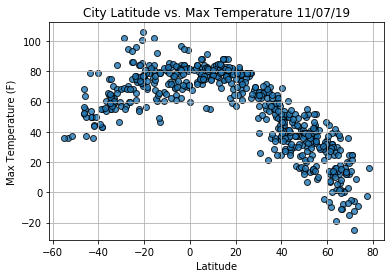

In [15]:
# Build the scatter plot for latitude vs. max temp
plt.scatter(lats, 
           max_temps,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

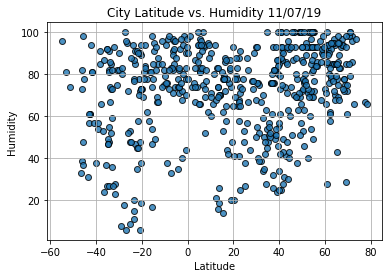

In [16]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats, 
           humidity,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

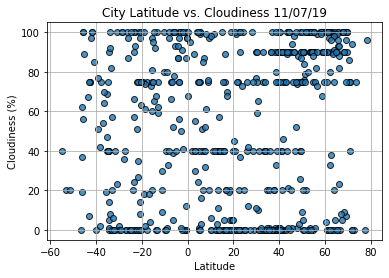

In [17]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, 
           cloudiness,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

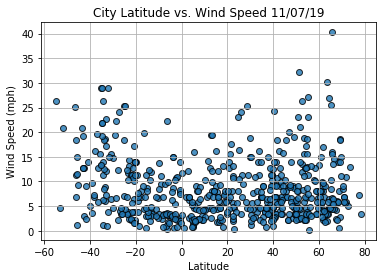

In [18]:
# Build the scatter plot for latitude vs. Wind speed
plt.scatter(lats, 
           wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

# Fix the plt.title string to make it Y vs. X, find a way to move r value to the plot

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope +  intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plt and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.annotate(r_value, text_coordinates, fontsize=15, color="blue")
    plt.title("Fix this")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                    Abu Zabad
Country                        SD
Date          2019-11-08 04:22:21
Lat                         12.35
Lng                         29.25
Max Temp                    76.32
Humidity                       21
Cloudiness                      0
Wind Speed                  12.77
Name: 13, dtype: object

In [21]:
# Northern Hemisphere cities
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
564    False
565    False
566     True
567     True
568     True
Name: Lat, Length: 569, dtype: bool

In [22]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

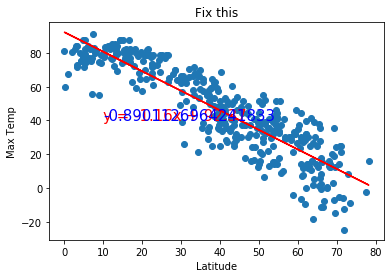

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (10,40))

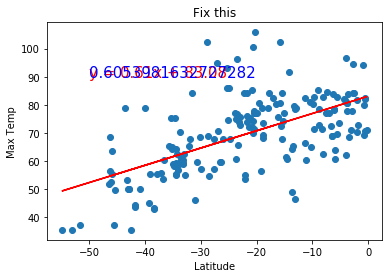

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-50,90))

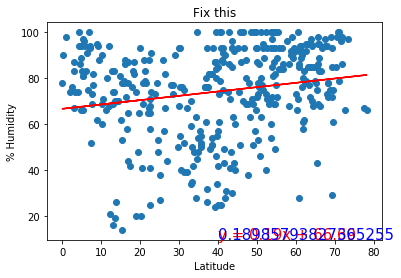

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (40,10))


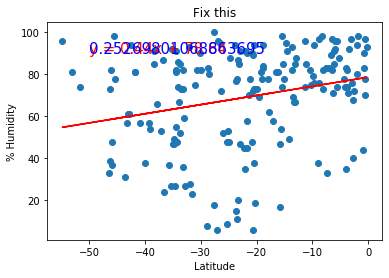

In [26]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-50,90))


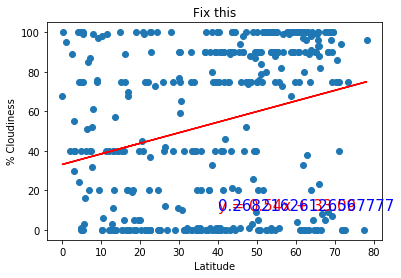

In [27]:
# Linear regression on the Northern Hemisphere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (40,10))


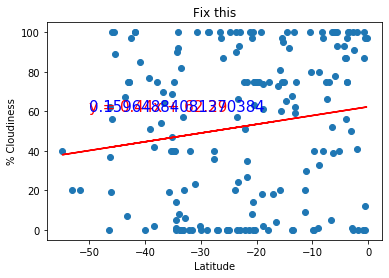

In [28]:
# Linear regression on the Southern Hemisphere on Cloudiness

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-50,60))


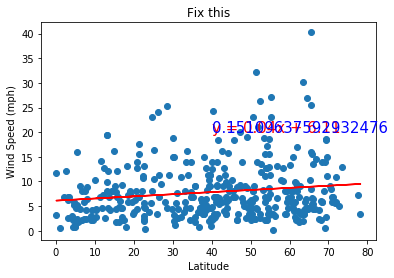

In [29]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)', (40,20))

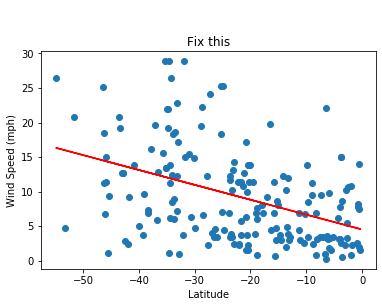

In [30]:
# Linear regression on the Southern Hemisphere on Wind Speed

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed (mph)', (-50,35))


# 6.5.2 Create Heatmaps

In [31]:
# Store the CSV you saved in part one into a DataFrame
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()


,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Muttupet,IN,2019-11-08 04:22:18,10.40,79.48,83.82,71,6,4.36
1,1,Mataura,NZ,2019-11-08 04:22:18,-46.19,168.86,68.45,39,37,11.21
2,2,Torbay,CA,2019-11-08 04:22:18,47.66,-52.73,37.40,69,75,13.87
3,3,Baghdad,IQ,2019-11-08 04:20:31,33.30,44.38,55.40,50,0,4.70
4,4,Kremenki,RU,2019-11-08 04:22:19,54.51,48.87,37.40,69,90,6.71


In [32]:
# Get the data types
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [33]:
gmaps.configure(api_key=g_key)

In [34]:
# Heatmap of temperature
# Get the latitude and longitude
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature
max_temp = city_data_df["Max Temp"]
# Assign the figure variable
fig = gmaps.figure()
# Assign the heatmap variable
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])
# Add the heatmap layer
fig.add_layer(heat_layer)
# Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

In [35]:
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.6)
fig

Figure(layout=FigureLayout(height='420px'))

In [36]:
# Heatmap of temperature with zoom
# Get the latitude and longitude
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature
max_temp = city_data_df["Max Temp"]
# Assign the figure variable
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.6)
# Assign the heatmap variable
#heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)

# Add the heatmap layer
fig.add_layer(heat_layer)
# Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

# This is identical to the max temp so something's not right - csv file suggests US humid places are in AK and FL, not CA. 

In [37]:
# Heatmap of percent humidity
# Get the latitude and longitude
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
# Assign the figure variable
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.6)
# Assign the heatmap variable
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

# Add the heatmap layer
fig.add_layer(heat_layer)
# Call the figure to plot the data
fig


Figure(layout=FigureLayout(height='420px'))

In [38]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the area
fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
# Heatmap of Windspeed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the area
fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
# Ask the customer to add a minimum and maximum temperature value
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 70
What is the maximum temperature you would like for your trip? 95


# Is temp from OpenWeather in F, K, C?

In [42]:
# Filter the dataset to find the cities that fit the criteria
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Muttupet,IN,2019-11-08 04:22:18,10.40,79.48,83.82,71,6,4.36
8,8,Butaritari,KI,2019-11-08 04:22:20,3.07,172.79,84.27,67,30,6.17
13,13,Abu Zabad,SD,2019-11-08 04:22:21,12.35,29.25,76.32,21,0,12.77
15,15,Vanimo,PG,2019-11-08 04:22:22,-2.67,141.30,84.24,68,100,5.44
16,16,Busselton,AU,2019-11-08 04:22:22,-33.64,115.35,70.32,52,0,8.95


In [43]:
preferred_cities_df.count()

City_ID       190
City          190
Country       190
Date          190
Lat           190
Lng           190
Max Temp      190
Humidity      190
Cloudiness    190
Wind Speed    190
dtype: int64

# No spots in North America or Northern Europe? Print to csv to sort

In [76]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp and coordinates
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Muttupet,IN,83.82,10.40,79.48,
8,Butaritari,KI,84.27,3.07,172.79,
13,Abu Zabad,SD,76.32,12.35,29.25,
15,Vanimo,PG,84.24,-2.67,141.30,
16,Busselton,AU,70.32,-33.64,115.35,
...,...,...,...,...,...,...
562,Carmen,PH,91.40,7.36,125.71,
563,Benghazi,LY,70.52,32.12,20.07,
564,Boende,CD,71.02,-0.28,20.88,
565,Mareeba,AU,82.40,-16.99,145.42,


In [65]:
# Set parameters to search for a hotel
params = {"radius": 5000, 
          "type": "lodging", 
          "key": g_key}

In [67]:
# Iterate through the DataFrame
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude
    lat = row["Lat"]    
    lng = row["Lng"]
    
    # Add the latitude and longitude to the params dictionary as values to the location key
    params["location"] = f"{lat},{lng}"
    
    # Use the search term: "lodging" and our latitude and longitude
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    # Make request and get the JSON data from the search
    hotels = requests.get(base_url, params=params).json()
    
    # Grab the first hotel from the results and store the name
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError)    :
        print("Hotel not found... skipping")

Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping
Hotel not found... skipping


In [68]:
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Muttupet,IN,83.82,10.40,79.48,Hotel Star Residency
8,Butaritari,KI,84.27,3.07,172.79,Isles Sunset Lodge
13,Abu Zabad,SD,76.32,12.35,29.25,
15,Vanimo,PG,84.24,-2.67,141.30,Vahmoneh Lodge Vanimo
16,Busselton,AU,70.32,-33.64,115.35,Observatory Guest House
17,Sassandra,CI,76.75,4.95,-6.09,la terrasse
24,Karratha,AU,85.23,-20.74,116.85,ibis Styles Karratha
25,Atuona,PF,80.44,-9.80,-139.03,Villa Enata
26,Dzilam Gonzalez,MX,81.61,21.28,-88.93,Amina
27,Beloha,MG,74.77,-25.17,45.06,


In [80]:
# Create hotel box template

info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

# Store the DataFrame Row
hotel_info = [info_box_template.format(**row)for index, row in hotel_df.iterrows()]

In [82]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.6)
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)

fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

In [83]:
# Latitude-longitude pairs
geneva = (46.2, 6.1)
montreux = (46.4, 6.9)
zurich = (47.4, 8.5)

fig = gmaps.figure()
geneva2zurich = gmaps.directions_layer(geneva, zurich)
fig.add_layer(geneva2zurich)
fig

Figure(layout=FigureLayout(height='420px'))